<a href="https://colab.research.google.com/github/Muhammadridho100902/google_collab/blob/main/Heart_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(color_codes=True)

In [ ]:
df = pd.read_csv('dataset_heart.csv')
df.head()

,age,sex,chest pain type,resting blood pressure,serum cholestoral,fasting blood sugar,resting electrocardiographic results,max heart rate,exercise induced angina,oldpeak,ST segment,major vessels,thal,heart disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,2
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,1
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,2
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,1
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,1


<Axes: >

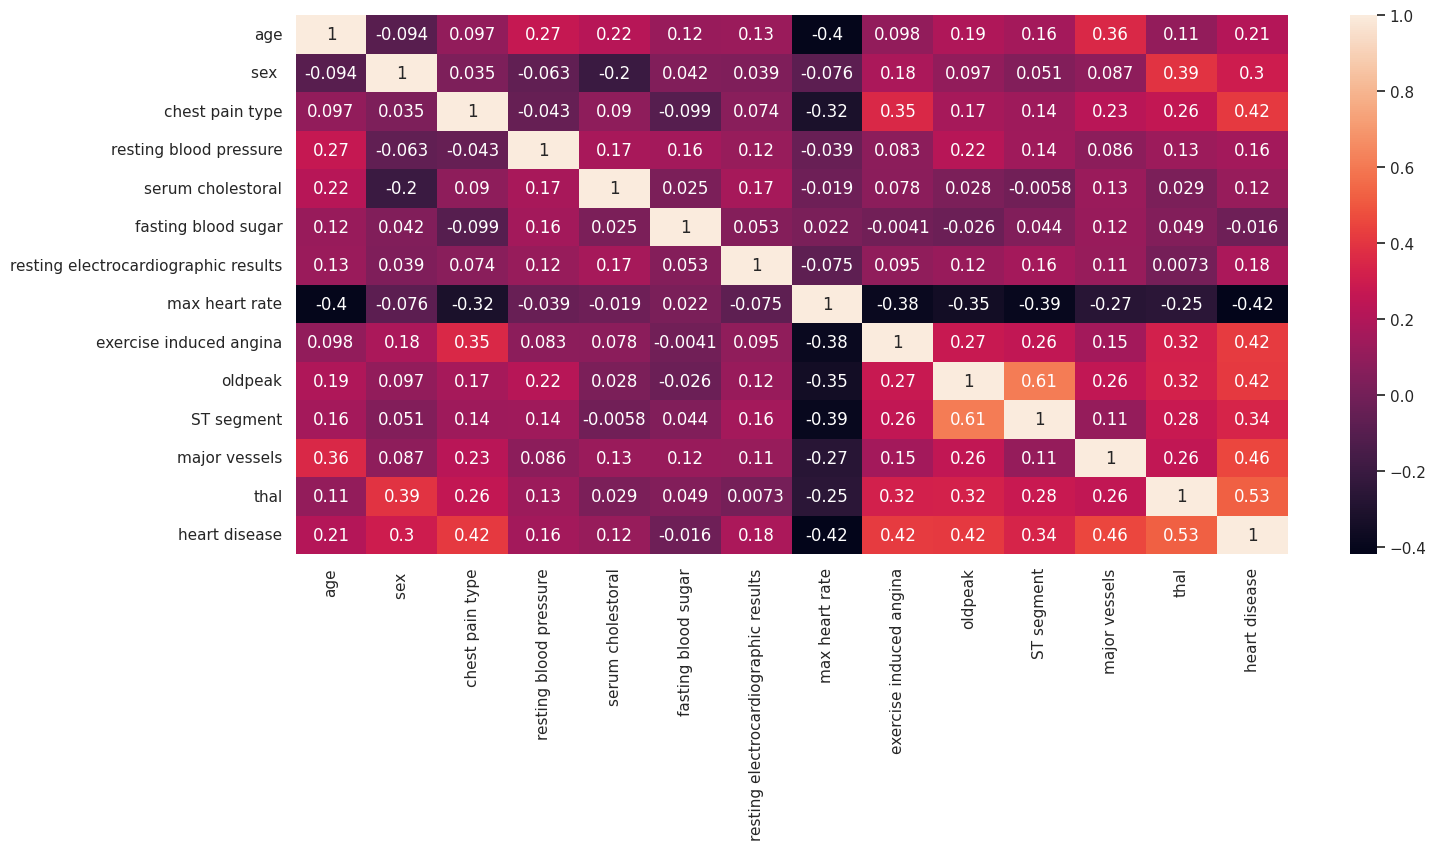

In [ ]:
plt.figure(figsize=(16,7))
sns.heatmap(df.corr(), fmt='.2g', annot=True)

# Train Test Split

In [ ]:
x = df.drop('heart disease', axis=1)
y = df['heart disease']

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

Remove Outliers

In [ ]:
df.columns

Index(['age', 'sex ', 'chest pain type', 'resting blood pressure',
       'serum cholestoral', 'fasting blood sugar',
       'resting electrocardiographic results', 'max heart rate',
       'exercise induced angina', 'oldpeak', 'ST segment', 'major vessels',
       'thal', 'heart disease'],
      dtype='object')

In [ ]:
from scipy import stats

selected_columns = ['age', 'sex ', 'chest pain type', 'resting blood pressure',
       'serum cholestoral', 'fasting blood sugar',
       'resting electrocardiographic results', 'max heart rate',
       'exercise induced angina', 'oldpeak', 'ST segment', 'major vessels',
       'thal']

z_scores = np.abs(stats.zscore(x_train[selected_columns]))

threshold = 3

outliers_indices = np.where(z_scores > threshold)[0]

x_train = x_train.drop(x_train.index[outliers_indices])
y_train = y_train.drop(y_train.index[outliers_indices])

# Modelling

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

dtree = DecisionTreeClassifier(class_weight='balanced')
param_grids = {
    'max_depth' : [3,4,5,6,7,8],
    'min_samples_split' : [2, 3, 4],
    'min_samples_leaf' : [1, 2, 3, 4],
    'random_state' : [0, 42],
}

grid_search = GridSearchCV(dtree, param_grids, cv=5)
grid_search.fit(x_train, y_train)

print(grid_search.best_params_)

{'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 0}


In [ ]:
dtree = DecisionTreeClassifier(max_depth=3, min_samples_leaf=1, min_samples_split=2, random_state=0)
dtree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = dtree.predict(x_test)
print('Accuracy Score :', round(accuracy_score(y_pred, y_test) * 100, 2),'%')

Accuracy Score : 77.78 %


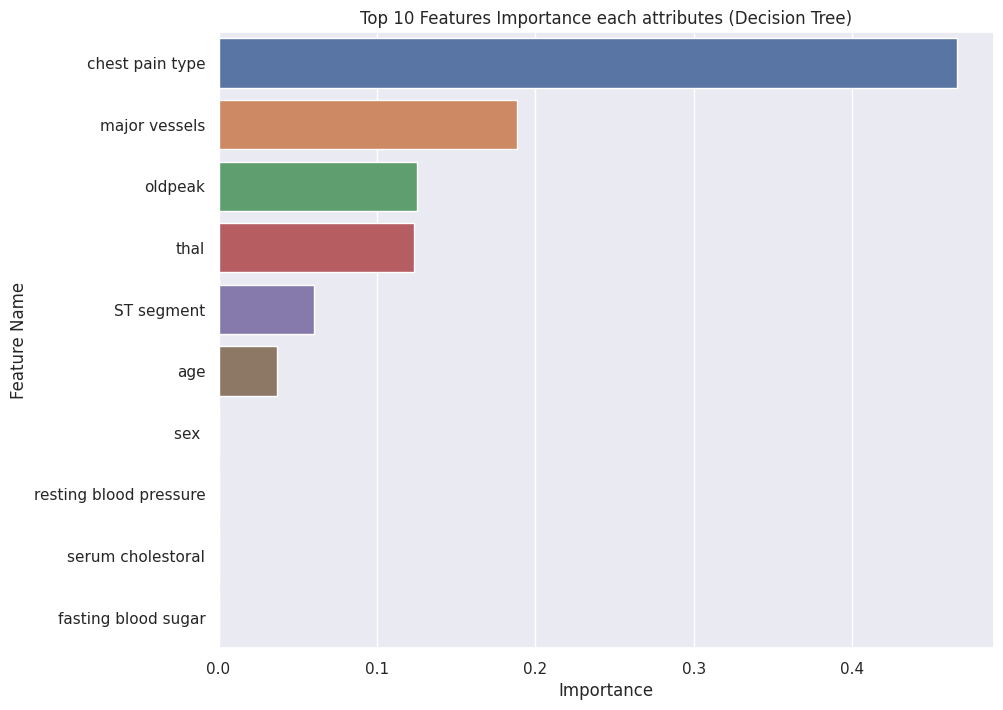

In [ ]:
imp_df = pd.DataFrame({
    'Feature Name' : x_train.columns,
    'Importance' : dtree.feature_importances_
})
fi = imp_df.sort_values(by='Importance', ascending = False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data = fi2, x='Importance', y = 'Feature Name')
plt.title('Top 10 Features Importance each attributes (Decision Tree)')
plt.xlabel('Importance')
plt.ylabel('Feature Name')
plt.show()


# SVM

In [ ]:
from sklearn.svm import SVC

# parameters = {'C': [1, 10], 
#           'gamma': [0.001, 0.01, 1]}
# model = SVC()
# grid = GridSearchCV(estimator=model, param_grid=parameters)
# grid.fit(x_train, y_train)
# print(grid)
# # summarize the results of the grid search
# print(grid.best_score_)
# print(grid.best_estimator_)
# print(grid.best_params_)

In [ ]:
svc = SVC(C = 10, gamma=0.001)
svc.fit(x_train, y_train)

y_pred = svc.predict(x_test)
print('Accuracy Score :', round(accuracy_score(y_test, y_pred) * 100, 2), '%')

Accuracy Score : 68.52 %


# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
error_rate = []

for i in range(1,40):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train, y_train)
  pred_i = knn.predict(x_test)
  error_rate.append(np.mean(pred_i != y_test))

Minimum error:- 0.2777777777777778 at K = 20


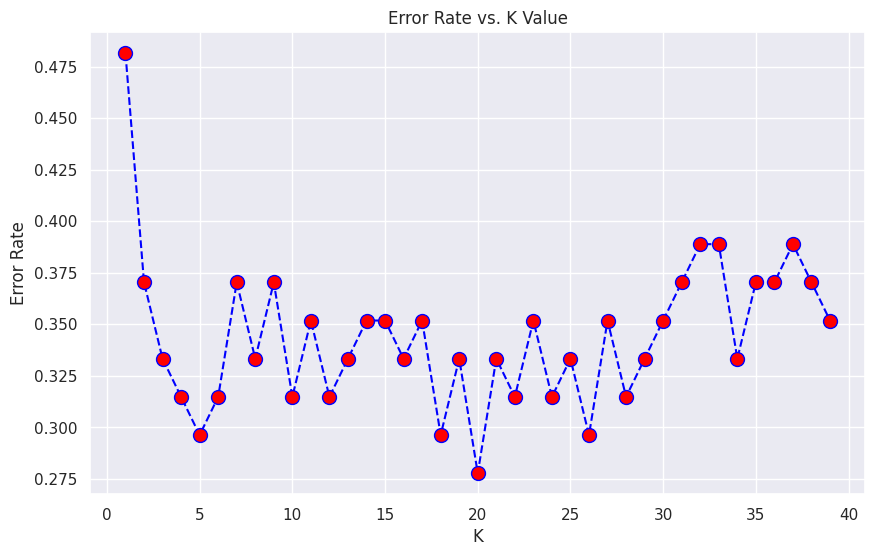

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed',marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
req_k_value = error_rate.index(min(error_rate))+1
print("Minimum error:-",min(error_rate),"at K =",req_k_value)

In [ ]:
# param_grid = {
#     'n_neighbors' : [20],
#     'weights': ['uniform', 'distance'],
#     'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
#     'leaf_size': [30, 40, 50],
# }

# knn = KNeighborsClassifier()

# grid_search = GridSearchCV(knn, param_grid, cv=5)
# grid_search.fit(x_train, y_train)

# print(grid_search.best_params_)
# print(grid_search.best_estimator_)

In [ ]:
knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, n_neighbors=20, weights= 'distance')
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

print('Accuracy Score :', round(accuracy_score(y_test, y_pred) * 100, 2), '%')

Accuracy Score : 66.67 %


# Gradient Boost

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# gbc = GradientBoostingClassifier()

# param_grid = {
#     'learning_rate': [0.1, 0.01, 0.001],
#     'n_estimators': [50, 100, 200],
#     'max_depth': [3, 5, 7],
#     'subsample': [0.8, 1.0],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# grid_search = GridSearchCV(gbc, param_grid, cv=5)
# grid_search.fit(x_train, y_train)

# print(grid_search.best_params_)
# print(grid_search.best_estimator_)

In [ ]:
gbc = GradientBoostingClassifier(learning_rate=0.01, max_depth=3, min_samples_leaf=2, min_samples_split=5, n_estimators=200, subsample=0.8)
gbc.fit(x_train, y_train)
y_pred = gbc.predict(x_test)

print('Accuracy Score :', round(accuracy_score(y_test, y_pred) * 100, 2),'%')

Accuracy Score : 81.48 %


In [ ]:
print(y_pred)

[1 1 2 2 1 1 1 1 1 1 1 1 1 2 2 1 1 2 2 1 2 1 2 2 2 1 1 1 2 1 1 2 2 1 2 2 2
 2 1 1 2 1 1 2 1 1 2 1 2 2 2 1 1 2]


Finish